# **Classification - MNIST**
**Done by:** Saja Abdalaal

### Import data

In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# X represents features, y represents the target
X, y = mnist.data, mnist.target
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 70,000 images, and each image has 784 features. <br>
This is because
each image is 28 × 28 pixels, and each feature simply represents one pixel’s
intensity, from 0 (white) to 255 (black).

In [4]:
print('X: ', X.shape)
print('y: ', y.shape)


X:  (70000, 784)
y:  (70000,)


### Example from data

Here we are going to take a closer look at some digit in the dataset.

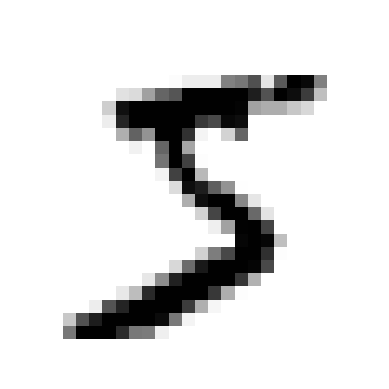

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

digit = X.iloc[0]
digit_image = digit.values.reshape(28, 28)

plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()

It looks like a 5, and that’s what the label told us


In [6]:
y[0]

'5'

Note that the label is a string, so let’s
cast y to integer

In [7]:
import numpy as np
y = y.astype(np.uint8)

In [8]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

### Test Set

The MNIST dataset is actually shuffled, so we can simply split it by slicing.<br>
**training set** (the first 60,000 images) and a **test set** (the last 10,000
images)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

This “5-detector” will be an example of a binary
classifier, capable of distinguishing between just two classes, 5 and not-5.

---------------------

In [10]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Now let’s pick a classifier and train it. A good place to start is with a
**[Stochastic Gradient Descent (SGD)](https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/)** classifier, using Scikit-Learn’s
**SGDClassifier** class. This classifier has the advantage of being capable of
handling very large datasets efficiently. This is in part because SGD deals
with training instances independently, one at a time (which also makes SGD
well suited for online learning).

-----------------------

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([digit])

array([ True])

### Performance Measures

#### Measuring Accuracy Using Cross-Validation


In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Wow! Above 93% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too
excited, let’s look at a very dumb classifier that just classifies every single
image in the “not-5” class:

In [14]:
from sklearn.base import BaseEstimator
class Not5Classifier(BaseEstimator):
  def fit(self, X, y=None): #the y parameter is set to None, indicating that it is not used in the training process.
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool) # always returns that it's not a 5 "Always False"


In [15]:
never_5_clf = Not5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

That’s right, it has over 90% accuracy! This is simply because only about
10% of the images are 5s, so if you always guess that an image is not a 5,
you will be right about 90% of the time. <br>
This demonstrates why accuracy is generally not the preferred performance
measure for classifiers, especially when you are dealing with skewed
datasets (i.e., when some classes are much more frequent than others).

------------------------

#### Confusion Matrix


In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [17]:
from sklearn.metrics import confusion_matrix
con_df = pd.DataFrame(confusion_matrix(y_train_5, y_train_pred), columns=['Not-5', '5'], index=['True', 'False'])
con_df

,Not-5,5
True,53892,687
False,1891,3530


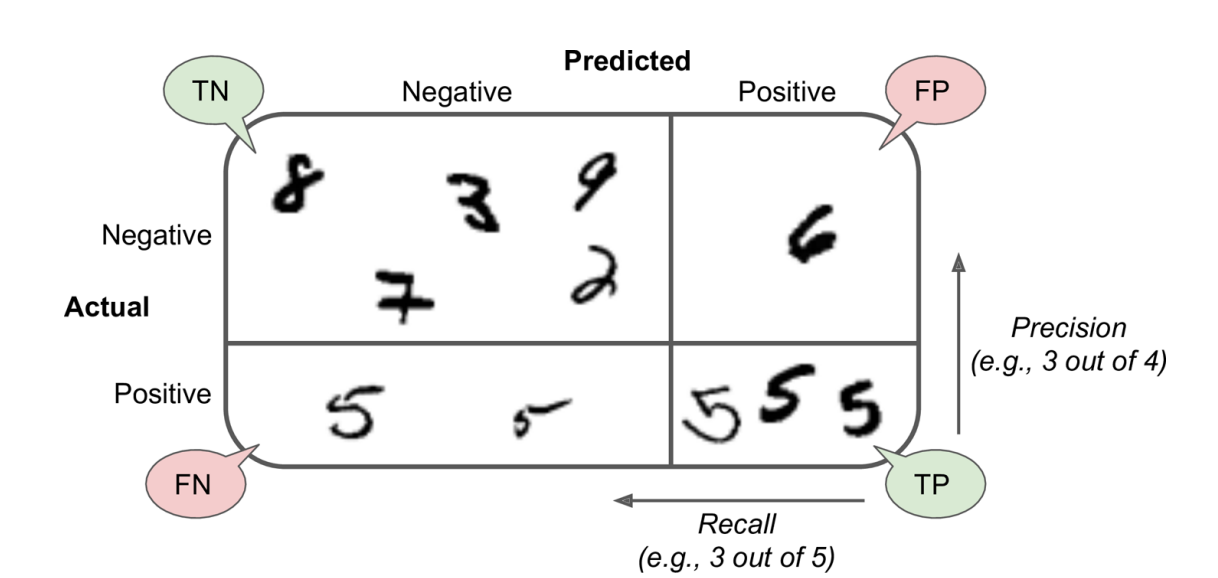

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



Now our 5-detector does not look as shiny as it did when we looked at its
accuracy. When it claims an image represents a 5, it is correct only 84%
of the time. Moreover, it only detects 65% of the 5s.

----------------------

**Note:** <br>
- **Precision** A high precision means few false positives. <br>
- **Recall** A high recall means few false negatives.

[Explained here!](https://youtu.be/qWfzIYCvBqo)

#### Precision/Recall Trade-off

Scikit-Learn does not let you set the threshold directly, but it does give you
access to the decision scores that it uses to make predictions. Instead of
calling the classifier’s `predict()` method, you can call its
[decision_function()](https://www.geeksforgeeks.org/ml-decision-function/) method, which returns a score for each instance,
and then use any threshold you want to make predictions based on those
scores:

In [19]:
y_scores = sgd_clf.decision_function([digit])
y_scores

array([2164.22030239])

In [20]:
threshold = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred

# It classifies it as 5!

array([ True])

What if we raised the threshold?

In [21]:
threshold = 8000
y_digit_pred = (y_scores > threshold)
y_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually
represents a 5, and the classifier detects it when the threshold is 0, but it
misses it when the threshold is increased to 8,000.

----------------------------

- But here's the question, How do we decide which threshold to use?

First, we use the
`cross_val_predict()` function to get the scores of all instances in the
training set, but this time specify that you want to return decision scores
instead of predictions:

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method='decision_function')

With these scores, use the `precision_recall_curve()` function to
compute precision and recall for all possible thresholds:

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

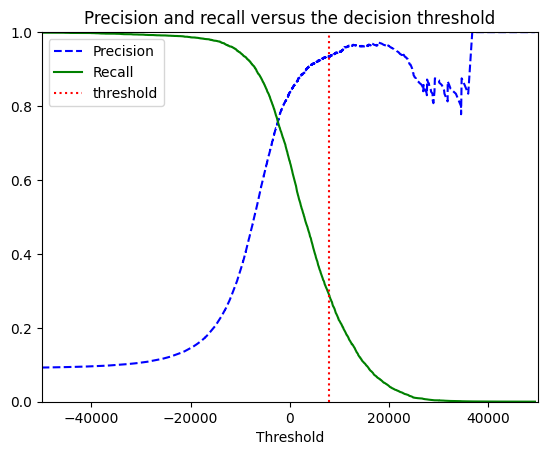

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.vlines(threshold, 0, 1.0, "r", "dotted", label="threshold")
  plt.legend()
  plt.axis([-50000, 50000, 0, 1]) # to edit numbers on x axis
  plt.title("Precision and recall versus the decision threshold")
  plt.xlabel("Threshold")


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Another way to select a good precision/recall trade-off is to plot precision
directly against recall, as shown in Figure below (the same threshold as earlier
is highlighted)

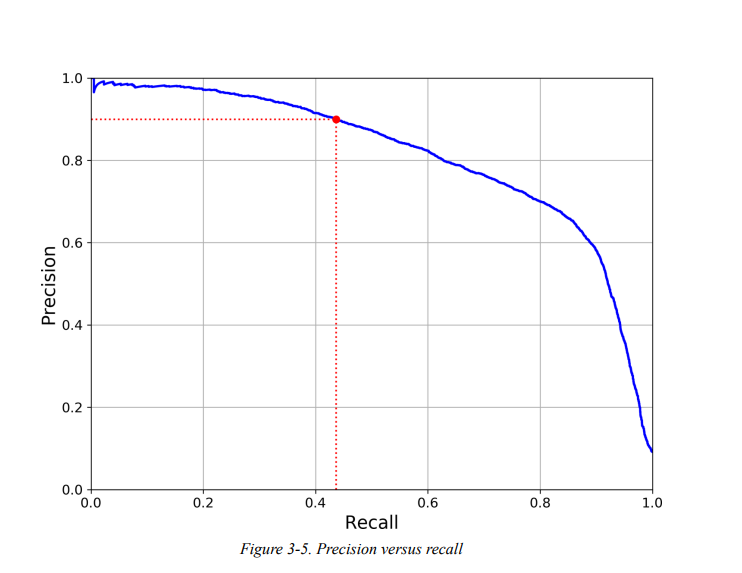

we can see that precision really starts to fall sharply around 80% recall.
You will probably want to select a precision/recall trade-off just before that
drop—for example, at around 60% recall. But of course, the choice depends
on your project.

---------------------------------------------


If you aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you
can search for the lowest threshold that gives you at least 90% precision
(np.argmax() will give you the first index of the maximum value, which in
this case means the first True value):


In [25]:
threshold_90_prec = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_prec

3370.019499143958

In [26]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_90 = (y_scores >= threshold_90_prec)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [27]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

----------------------------------------------

#### The ROC Curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.([Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5))

Hence, the ROC curve plots sensitivity (recall) versus 1 –
specificity.


To plot the ROC curve, you first use the roc_curve() function to compute
the TPR and FPR for various threshold values:

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # train, predict

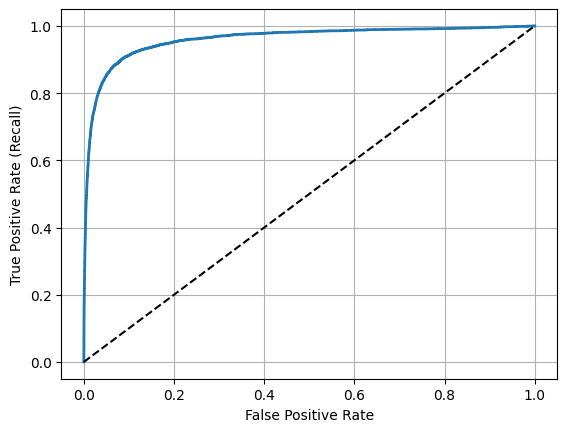

In [29]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid()

plot_roc_curve(fpr, tpr)
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Note:**

As a rule of thumb, you should prefer the PR curve
whenever the positive class is rare or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. For example, looking at the previous
ROC curve (and the ROC AUC score), you may think that the classifier is really good.
But this is mostly because there are few positives (5s) compared to the negatives (non 5s). In contrast, the PR curve makes it clear that the classifier has room for improvement
(the curve could be closer to the top-left corner).

-------------------------------

### Random Forest Classifier

Train a RandomForestClassifier and compare its ROC curve
and ROC AUC score to those of the SGDClassifier.

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [32]:
y_scores_forest = y_probas_forest[:, 1] # proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

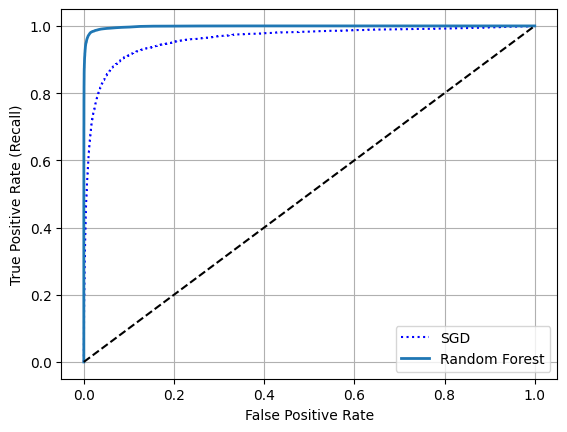

In [33]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

As we can see in the previous figure, RandomForestClassifier’s ROC curve
looks much better than SGDClassifier’s `it comes much closer to the
top-left corner`. <br>
As a result, its ROC AUC score is also significantly better:


In [34]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification


### SVC

In [35]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([digit])

array([5], dtype=uint8)

In [36]:
some_digit_scores = svm_clf.decision_function([digit])
some_digit_scores # one score per class


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [37]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

The highest score is indeed the one corresponding to class 5!

In [ ]:
# using OVR
# from sklearn.multiclass import OneVsRestClassifier
# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train, y_train)
# ovr_clf.predict([digit])

### SGD Classifier

In [42]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([digit])

array([3], dtype=uint8)

This time Scikit-Learn did not have to run OvR or OvO because SGD
classifiers can directly classify instances into multiple classes.

In [43]:
sgd_clf.decision_function([digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [45]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,
                scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

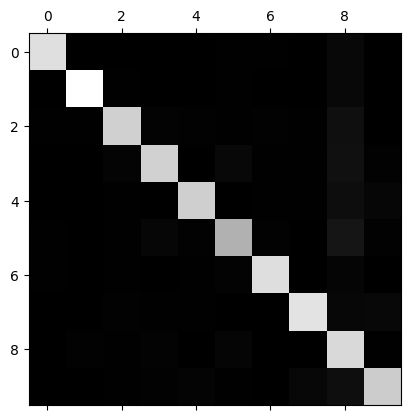

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks pretty good, since most images are on the main
diagonal, which means that they were classified correctly. The 5s look
slightly darker than the other digits, which could mean that there are fewer
images of 5s in the dataset or that the classifier does not perform as well on
5s as on other digits. In fact, you can verify that both are the case. <br>

Now Let’s focus the plot on the errors.

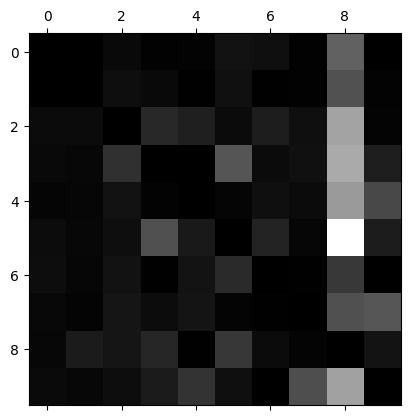

In [50]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray) # rows represent actual classes, while columns represent predicted classes
plt.show()

The column for class 8 is quite bright, which tells you that many images get
misclassified as 8s. However, the row for class 8 is not that bad, telling you
that actual 8s in general get properly classified as 8s. As you can see, the
confusion matrix is not necessarily symmetrical. You can also see that 3s
and 5s often get confused (in both directions).